In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load data
df = pd.read_csv('data/sample_data_pca.csv')
df.head()

,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
0,1,1,0.0000,0.0891,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.0001,0.0606,0.0,0.0000,0.0578,0.1554,0.0001,0.0000,0.0000
1,2,0,0.0000,0.0000,0.0,0.0,0.0,0.0001,0.0,0.0,...,0.0008,0.0000,0.0016,0.0,0.0000,0.0000,0.0030,0.0034,0.8695,0.0037
2,3,1,0.0002,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.7179,0.0000,0.0008
3,4,1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0146,0.0275,0.0060,0.0,0.1724,0.0000,0.0021,0.0012,0.0000,0.0000
4,5,1,0.0006,0.0000,0.0,0.0,0.0,0.0002,0.0,0.0,...,0.0310,0.1061,0.0000,0.0,0.0010,0.0000,0.6773,0.0000,0.0000,0.0000


In [3]:
# shuffle data
df = shuffle(df)

In [4]:
# drop unecessary columns
df.drop('user_id', axis = 1, inplace = True)

In [5]:
# class balance (proportion of 1s and 0s we're predicting for)
df['purchased_album'].value_counts(normalize = True) # normalize outputs the percentages

1    0.533708
0    0.466292
Name: purchased_album, dtype: float64

In [6]:
# deal with missing value
df.isna().sum().sum() # total count of na values (none in this case)

0

In [7]:
# split input and output variables
X = df.drop(['purchased_album'], axis = 1) # input vairables
y = df['purchased_album'] # output variable

In [8]:
# split data into training and test sets
# stratify to ensure same proportion of classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y) 

In [9]:
# feature scaling
scale_standard = StandardScaler()

X_train = scale_standard.fit_transform(X_train)
X_test = scale_standard.transform(X_test)

In [10]:
# apply pca
# instantiate PCS
pca = PCA(n_components = None)

# fit object to training data
pca.fit(X_train)

PCA()

In [11]:
# extract the explained variance across components
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()

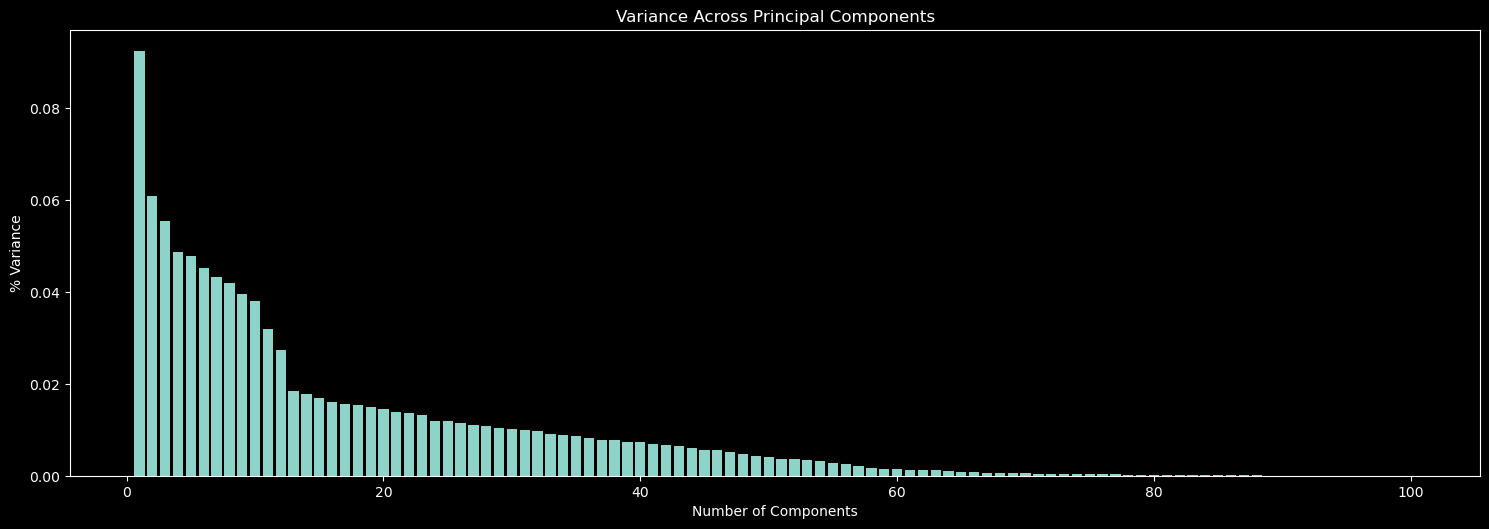

In [12]:
# create list for number of components
num_vars_list = list(range(1, 101))

# plot the explained variance across components
plt.figure(figsize = (15, 10))
plt.subplot(2, 1, 1)
plt.bar(num_vars_list, explained_variance)
plt.title('Variance Across Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('% Variance')
plt.tight_layout()

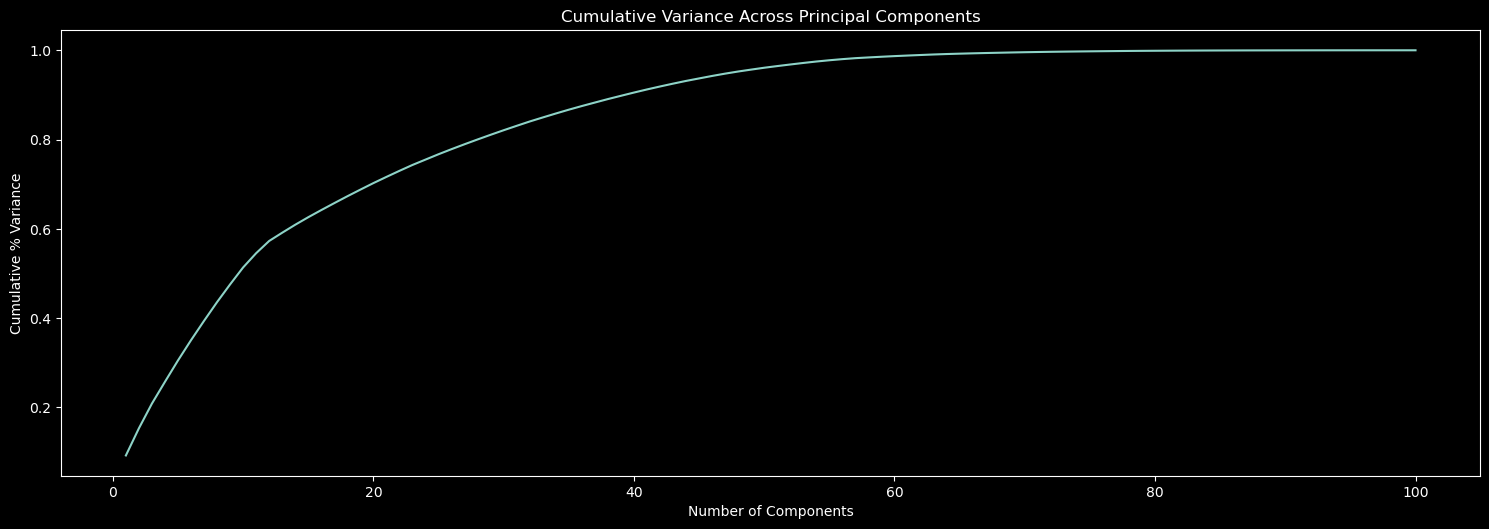

In [13]:
# plot the cumulative variance
plt.figure(figsize = (15, 10))
plt.subplot(2, 1, 2)
plt.plot(num_vars_list, explained_variance_cumulative)
plt.title('Cumulative Variance Across Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative % Variance')
plt.tight_layout()

In [14]:
# apply pca with specified number of components
# instantiate PCS
pca = PCA(n_components = 0.75) # creates the right number of components that will explain 75% of the variance

# fit object to training data
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# display number of components specified
pca.n_components_

24

In [15]:
# instantiate random forest and fit data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# assess model accuracy 
y_pred_class = clf.predict(X_test)

In [17]:
# accuracy score (number of correct classification out of all attempted classifications)
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.9166666666666666


In [18]:
# precision score (of all observations predicted positive, how many were actually positive)
precision = precision_score(y_test, y_pred_class)
print(f'Precision Score: {precision}')

Precision Score: 0.9


In [19]:
# recall score (of all positive observations, how many were predicted as positive)
recall = recall_score(y_test, y_pred_class)
print(f'Recall Score: {recall}')

Recall Score: 0.9473684210526315


In [20]:
# F1-Score (harmonic mean of precision and recall) (useful for imbalanced data)
f1 = f1_score(y_test, y_pred_class)
print(f'F1-Score: {f1}')

F1-Score: 0.9230769230769231
